In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\bakch\Downloads\facebook')

In [3]:
def read_circles(file_path):
    with open(file_path) as f :
        content = f.readlines()
        content = [line.replace("\n","") for line in content]
        content = [line.split("\t") for line in content]
    return {circle[0]:list(map(int,circle[1:])) for circle in content}

In [4]:
E = nx.read_edgelist('107.edges', nodetype=int)
circles = read_circles("107.circles")

In [5]:
G = nx.Graph()
G.add_edges_from(E.edges)

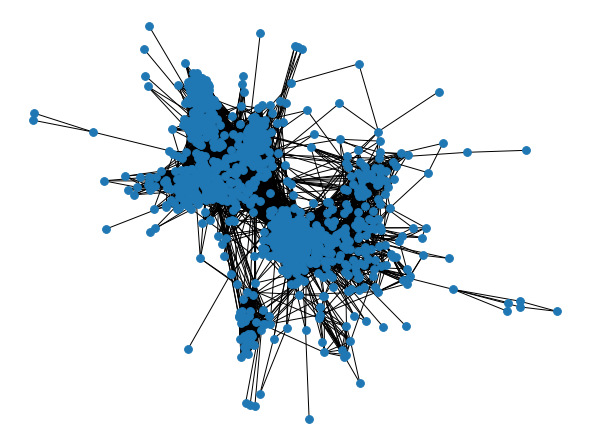

In [6]:
# plt.figure(figsize=(5,3))

# nx.draw(G, node_color='lightblue', with_labels=True, node_size=400)

plt.figure(figsize=(8,6))
nx.draw(G, node_size=60)

In [7]:
# network properties

# reciprocity: tendency for directed ties from actor i to actor j be reciprociated and sent back from actor j to actor i
print(nx.reciprocity(G)) # 0 because it is an undirected network

# transitivity: tendency for friends of friends to be friends and enemies of enemies to be enemies. 
# two nodes being connected to a third increases the likelihood that they will connect themselves.
# the extent to which nodes tend to form triangles or clusters of connections
# a moderate level of clustering in the network
print(nx.transitivity(G))

# preferential attachment: tendency for nodes that are already central to gain more connections at a greater rate than those who are not already central. 
preferential_attachment = nx.preferential_attachment(G)
print(next(preferential_attachment))

# structural equivalence: actors occupying the same position in the network relative to all other actors.

# clique: a subset of actors in a network such that every two actors in the subset are connected by a tie.
print(next(nx.enumerate_all_cliques(G)))

0.0
0.5045088189930924
(0, 348, 34)
[953]


In [8]:
# degree centrality: number of direct, immediate connections a node has to other nodes within the network
# e.g., high degree centrality = large number of friends on Facebook
# how many direct connections a node has
degree_centrality = nx.degree_centrality(G)
max(degree_centrality.items())

(1911, 0.036786060019361085)

In [9]:
max(degree_centrality.items())[1]

0.036786060019361085

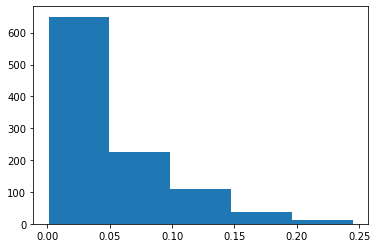

In [10]:
data_degree = list(degree_centrality.values())

num_bins=5

plt.hist(data_degree, num_bins)

plt.show()

In [11]:
# betweenness centrality: the extent to which a node lies on paths between other nodes
# quantifies how often a node acts as a bridge along the shortest path between two other nodes
# calculation: given all shortest paths in the network, how many times a particular node falls on these paths?
# a node with high betwenness centrality may have lower degree centrality
# how often a node serves as "a connector" along the shortest route
betweenness_centrality = nx.betweenness_centrality(G)
max(betweenness_centrality.items())

(1911, 0.0022616887050621575)

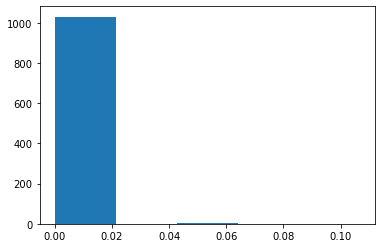

In [12]:
data_betweenness = list(betweenness_centrality.values())

plt.hist(data_betweenness, num_bins)

plt.show()

In [13]:
# closeness centrality: measures how close a node is to all other nodes in the network
# nodes with a high closeness centrality can quickly interact with all others
# reciprocal of the sum of the shortest path distances from the node to all other nodes
# a city with high closeness centrality would be one that has short travel times to all other cities in the network
# how "quickly" a node can interact
closeness_centrality = nx.closeness_centrality(G)
max(closeness_centrality.items())

(1911, 0.3515997277059224)

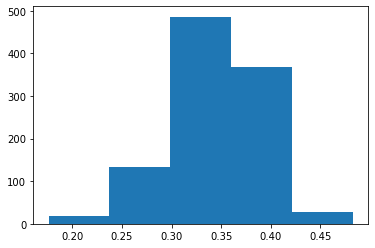

In [14]:
data_closeness = list(closeness_centrality.values())

plt.hist(data_closeness, num_bins)

plt.show()

In [15]:
# eigenvector centrality: 
# numbre of connections a node has (e.g., degree centrality) + quality of these connections
# a paper with high eigenvector centrality is one that is cited by other papers that have high scores
# if a paper is cited by other highly influential papers, it is considered more central.
# how "influential" a node is, considering bot the number and the quality of its connections

In [16]:
eigenvector_centrality_numpy = nx.eigenvector_centrality_numpy(G)
max(eigenvector_centrality_numpy.items())

(1911, 0.006236405490703265)

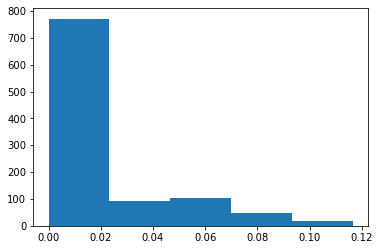

In [17]:
data_eigenvector = list(eigenvector_centrality_numpy.values())
plt.hist(data_eigenvector, num_bins)

plt.show()

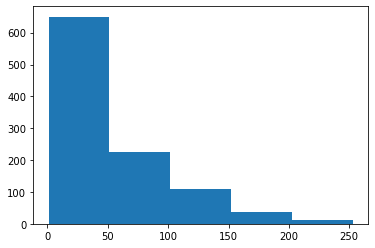

In [18]:
data_degree = [x[1] for x in list(G.degree)]

plt.hist(data_degree, num_bins)

plt.show()

In [19]:
# betweenness centrality vs. brokerage centrality
# path vs. group connection

# types of brokerage relationships
# coordinator
# gatekeeper
# representative
# liaison (or consultant)
# itinerant broker

In [20]:
df_centrality = pd.DataFrame(degree_centrality.values(), degree_centrality.keys()).reset_index()

df_centrality.columns = ['node_id', 'degree_centrality']

In [21]:
centrality_measures = {
    'betweenness_centrality': betweenness_centrality,
    'closeness_centrality': closeness_centrality,
    'eigenvector_centrality': eigenvector_centrality_numpy,
    'node_degree': dict(G.degree)
}

# Applying the mapping to create new columns in df_centrality
for column, function in centrality_measures.items():
    df_centrality[column] = df_centrality['node_id'].map(function)

In [22]:
df_centrality[df_centrality.node_id == 1043]

,node_id,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,node_degree
968,1043,0.010649,0.000593,0.277464,0.000006,11


In [23]:
df_centrality.to_csv('107_centrality.csv', index=False)

In [24]:
# use PCA to identify clusters among the nodes